<a href="https://colab.research.google.com/github/gigikenneth/netflix/blob/main/netflix2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('ViewingActivityy.csv')

In [3]:
df.head(4)

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Gigi,26-12-21 13:27,0:00:22,NaN,Titans: Season 3: Troubled Water (Episode 10),NaN,Android DefaultWidevineL3Phone Android Phone,0:01:59,0:01:59,NG (Nigeria)
1,Gigi,26-12-21 13:18,0:09:20,NaN,Titans: Season 3: Souls (Episode 9),NaN,Android DefaultWidevineL3Phone Android Phone,0:44:35,0:44:35,NG (Nigeria)
2,Gigi,26-12-21 8:01,0:18:01,NaN,Titans: Season 3: Souls (Episode 9),NaN,Android DefaultWidevineL3Phone Android Phone,0:35:22,Not latest view,NG (Nigeria)
3,Gigi,26-12-21 8:00,0:00:39,NaN,Titans: Season 3: Souls (Episode 9),NaN,Android DefaultWidevineL3Phone Android Phone,0:17:22,Not latest view,NG (Nigeria)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3652 entries, 0 to 3651
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Profile Name             3652 non-null   object
 1   Start Time               3652 non-null   object
 2   Duration                 3652 non-null   object
 3   Attributes               31 non-null     object
 4   Title                    3652 non-null   object
 5   Supplemental Video Type  1125 non-null   object
 6   Device Type              3652 non-null   object
 7   Bookmark                 3652 non-null   object
 8   Latest Bookmark          3652 non-null   object
 9   Country                  3652 non-null   object
dtypes: object(10)
memory usage: 285.4+ KB


In [5]:
df.tail()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
3647,Gigi,08-08-21 22:22,0:00:05,NaN,Clip 6: Headspace Guide to Sleep: Season 1 (In...,HOOK,Android DefaultWidevineL3Phone Android Phone,0:00:04,0:00:04,NG (Nigeria)
3648,Gigi,08-08-21 22:22,0:00:46,NaN,Headspace Guide to Sleep: Season 1: How to Sle...,NaN,Android DefaultWidevineL3Phone Android Phone,0:00:45,0:00:45,NG (Nigeria)
3649,Gigi,08-08-21 22:21,0:00:29,Has branched playback;,Headspace: Unwind Your Mind,NaN,Android DefaultWidevineL3Phone Android Phone,0:00:28,Not latest view,NG (Nigeria)
3650,Gigi,08-08-21 22:20,0:00:23,NaN,Bonus Video: Headspace: Unwind Your Mind,HOOK,Android DefaultWidevineL3Phone Android Phone,0:00:23,Not latest view,NG (Nigeria)
3651,Gigi,08-08-21 22:19,0:00:53,NaN,The Game Changers_hook_04_16x9,HOOK,Android DefaultWidevineL3Phone Android Phone,0:00:53,0:00:53,NG (Nigeria)


In [6]:
df.describe()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
count,3652,3652,3652,31,3652,1125,3652,3652,3652,3652
unique,1,3245,1659,2,1698,5,5,1938,937,5
top,Gigi,14-08-21 1:05,0:00:04,Autoplayed: user action: None;,The Harder They Fall,HOOK,Android DefaultWidevineL3Phone Android Phone,0:00:04,Not latest view,NG (Nigeria)
freq,3652,5,92,20,16,680,2332,82,1952,3644


In [7]:
df1 = df.drop(['Supplemental Video Type', 'Attributes', 'Bookmark', 'Latest Bookmark'], axis=1)

In [8]:
df.head()

,Profile Name,Start Time,Duration,Attributes,Title,Supplemental Video Type,Device Type,Bookmark,Latest Bookmark,Country
0,Gigi,26-12-21 13:27,0:00:22,NaN,Titans: Season 3: Troubled Water (Episode 10),NaN,Android DefaultWidevineL3Phone Android Phone,0:01:59,0:01:59,NG (Nigeria)
1,Gigi,26-12-21 13:18,0:09:20,NaN,Titans: Season 3: Souls (Episode 9),NaN,Android DefaultWidevineL3Phone Android Phone,0:44:35,0:44:35,NG (Nigeria)
2,Gigi,26-12-21 8:01,0:18:01,NaN,Titans: Season 3: Souls (Episode 9),NaN,Android DefaultWidevineL3Phone Android Phone,0:35:22,Not latest view,NG (Nigeria)
3,Gigi,26-12-21 8:00,0:00:39,NaN,Titans: Season 3: Souls (Episode 9),NaN,Android DefaultWidevineL3Phone Android Phone,0:17:22,Not latest view,NG (Nigeria)
4,Gigi,26-12-21 8:00,0:00:09,NaN,Titans: Season 1_VAR2-RECIPE-1_AGENCY1,TEASER_TRAILER,Android DefaultWidevineL3Phone Android Phone,0:00:09,0:00:09,NG (Nigeria)


In [9]:
df1.dtypes

Profile Name    object
Start Time      object
Duration        object
Title           object
Device Type     object
Country         object
dtype: object

In [10]:
#convert start time to datetime
df1['Start Time'] = pd.to_datetime(df1['Start Time'], utc=True)
df1.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration                     object
Title                        object
Device Type                  object
Country                      object
dtype: object

In [11]:
df1.head()

,Profile Name,Start Time,Duration,Title,Device Type,Country
0,Gigi,2021-12-26 13:27:00+00:00,0:00:22,Titans: Season 3: Troubled Water (Episode 10),Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
1,Gigi,2021-12-26 13:18:00+00:00,0:09:20,Titans: Season 3: Souls (Episode 9),Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
2,Gigi,2021-12-26 08:01:00+00:00,0:18:01,Titans: Season 3: Souls (Episode 9),Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
3,Gigi,2021-12-26 08:00:00+00:00,0:00:39,Titans: Season 3: Souls (Episode 9),Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)
4,Gigi,2021-12-26 08:00:00+00:00,0:00:09,Titans: Season 1_VAR2-RECIPE-1_AGENCY1,Android DefaultWidevineL3Phone Android Phone,NG (Nigeria)


In [12]:
#converting duration to a timedelta

df1['Duration'] = pd.to_timedelta(df1['Duration'])

df1.dtypes

Profile Name                 object
Start Time      datetime64[ns, UTC]
Duration            timedelta64[ns]
Title                        object
Device Type                  object
Country                      object
dtype: object

filtering 'Squid Game' using str.contains()

In [13]:
# create a new dataframe called office that that takes from df
# only the rows in which the Title column contains 'Squid Game'

squid =  df1[df1['Title'].str.contains('Squid Game', regex=False)]

In [14]:
squid.describe()

,Duration
count,55
mean,0 days 00:16:58.472727272
std,0 days 00:17:12.837046674
min,0 days 00:00:04
25%,0 days 00:00:40.500000
50%,0 days 00:14:28
75%,0 days 00:27:08
max,0 days 00:55:19


In [15]:
squid.shape

(55, 6)

In [16]:
import matplotlib as plt

In [17]:
squid = squid[(squid['Duration'] > '0 days 00:01:00')]

In [18]:
squid.shape

(39, 6)

In [19]:
squid['Duration'].sum()

Timedelta('0 days 15:29:10')

when did i watch squid game

In [20]:
squid['weekday'] = squid['Start Time'].dt.weekday
#.dt.weekdaysquid['hour'] = squid['Start Time'].dt.hour


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
squid['hour'] = squid['Start Time'].dt.hour
#squid.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [22]:
squid.head(1)

,Profile Name,Start Time,Duration,Title,Device Type,Country,weekday,hour
1966,Gigi,2021-04-10 20:28:00+00:00,0 days 00:27:17,Squid Game: Season 1: One Lucky Day (Episode 9),Android DefaultWidevineL3Phone Android Phone,NG (Nigeria),5,20


In [23]:
#set our categorical and define the order so the days are plotted Monday-Sunday
squid['weekday'] = pd.Categorical(squid['weekday'], categories = [0,1,2,3,4,5,6], ordered=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [24]:
squid_day_by_day = squid['weekday'].value_counts()

In [25]:
#sort the index using our categorical
squid_day_by_day = squid_day_by_day.sort_index()

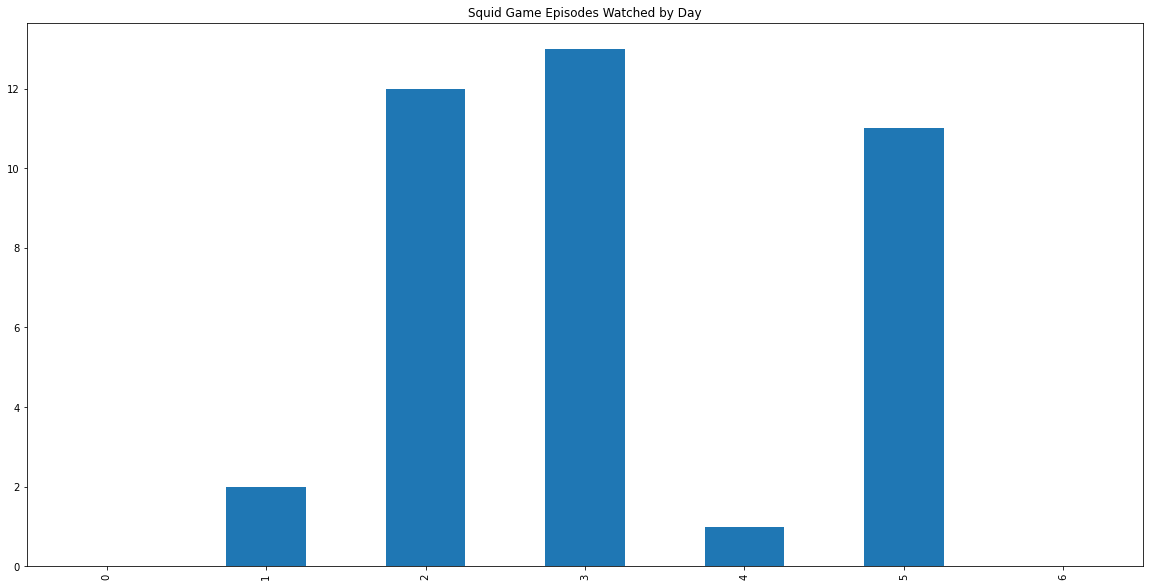

In [26]:
squid_day_by_day.plot(kind='bar', figsize=(20,10), title='Squid Game Episodes Watched by Day')

In [27]:
#by hour

squid['hour'] = pd.Categorical(squid['hour'], categories= [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23], ordered=True)

In [28]:
squid_by_hour = squid['hour'].value_counts()

In [29]:
squid_by_hour = squid_by_hour.sort_index()

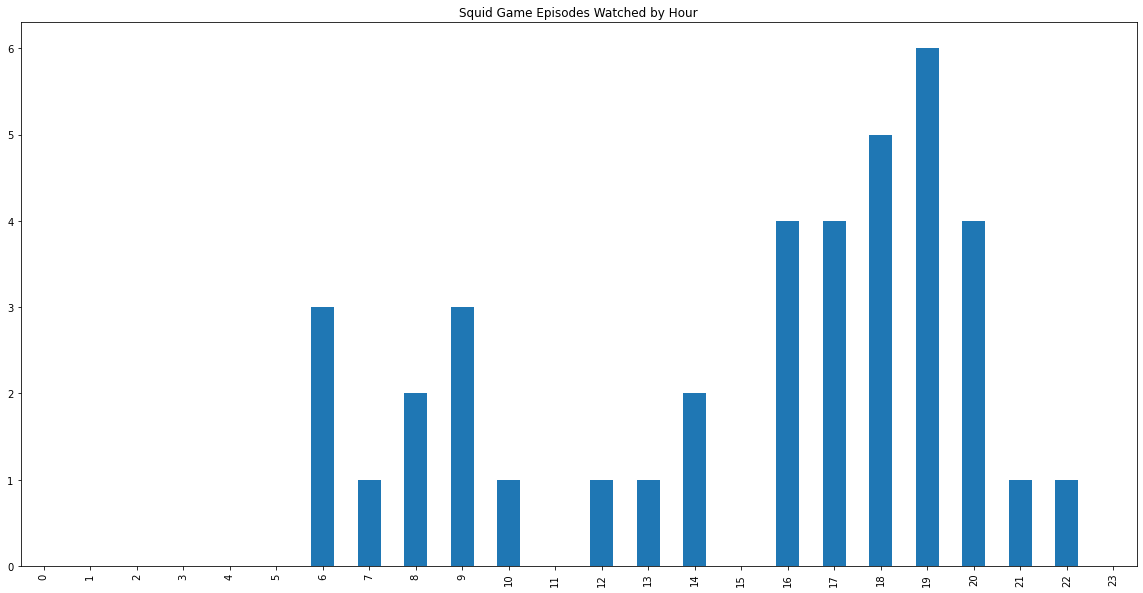

In [30]:
squid_by_hour.plot(kind='bar', figsize=(20,10), title='Squid Game Episodes Watched by Hour')